轨迹生成器

In [7]:
import numpy as np
import time

#function neccesary to build a parametrized bezier curve 
def f(n,i):
    '''calculates binomial factor (n k)'''
    return np.math.factorial(n)/(np.math.factorial(i)*np.math.factorial(n-i))

def b(t, n, i, point):
    '''n points bezier curve'''
    return point*f(n,i)*np.power(t,i)*np.power(1-t,n-i)

class Gait:
    def __init__(self, gait_type=0):
        self.virtual_displacement = 0.0008
        self.uniform_step = 0.05
        self.bezier_curve_nb = 10
        
        self.stance_period = 0.25
        # 0 - trot
        self.gait_type = gait_type
        self.phase_offsets = []
        self.phase_offsets.append([0., 0.5, 0., 0.5])
        self.stance_props = []
        self.stance_props.append(0.5)

        self.cur_phase_offset = self.phase_offsets[self.gait_type]
        self.cur_stance_prop = self.stance_props[self.gait_type]

        self.swing_period = self.stance_period / self.cur_stance_prop * (1. - self.cur_stance_prop)
        self.period = self.stance_period + self.swing_period
    
    def edge(self, a):
        if np.abs(a) < 1e-6:
            return 0.0
        else:
            return a

    def stance_phase(self, phase, dir, v):
        '''
        Args:
            phase： 相位，[0,1]
            dir：方向，与 x 轴正方向夹角
        Return:
            x,y,z 当前相位对应曲线的坐标
        '''
        c = self.edge(np.cos(dir))
        s = self.edge(np.sin(dir))
        
        phase_warp = 1-2*phase # 1 ~ 0 ~ -1

        p_stance = -self.uniform_step * phase
        
        x =  c * p_stance
        y = -s * p_stance
        z = -self.virtual_displacement*np.cos(phase_warp * np.pi / 2.)
        
        return [x*v,y*v,z]

    def swing_phase(self, phase, dir, v):
        c = self.edge(np.cos(dir))
        s = self.edge(np.sin(dir))

        X = np.array([-0.05, -0.06, -0.07, -0.07, 0.  ,  0.  ,  0.07,  0.07,  0.06,  0.05])*c
        Y = np.array([ 0.05,  0.06,  0.07,  0.07, 0.  , -0.  , -0.07, -0.07, -0.06, -0.05])*s
        Z = np.array([ 0.  ,  0.  ,  0.05,  0.05, 0.05,  0.06,  0.06,  0.06,  0.  ,  0.  ])

        x = 0.
        y = 0.
        z = 0.
        n = self.bezier_curve_nb

        for i in range(n): #sum all terms of the curve
            x = x + b(phase,n,i,X[i]) 
            y = y + b(phase,n,i,Y[i])
            z = z + b(phase,n,i,Z[i])
            
        return [x*v,y*v,z*v]
    
    def gait(self, time, v, v_dir, w, w_dir, r):
        '''
        线速度 v 及线速度方向 v_dir
        角速度 w 及角速度方向 w_dir
        r 是脚距离机体中心水平投影长度
        '''
        time = np.array(self.cur_phase_offset) * self.period + time
        p = 0.

        pos = []
        for i in range(4):
            t = time[i] - int(time[i] / self.period) * self.period
            t = np.clip(t, 0, self.period)

            if t < self.stance_period:
                p = 1. / self.stance_period * t
                pos.append(self.stance_phase(p, v_dir, v))
            else:
                p = 1. / self.swing_period * (t - self.stance_period)
                pos.append(self.swing_phase(p, v_dir, v))

        return pos

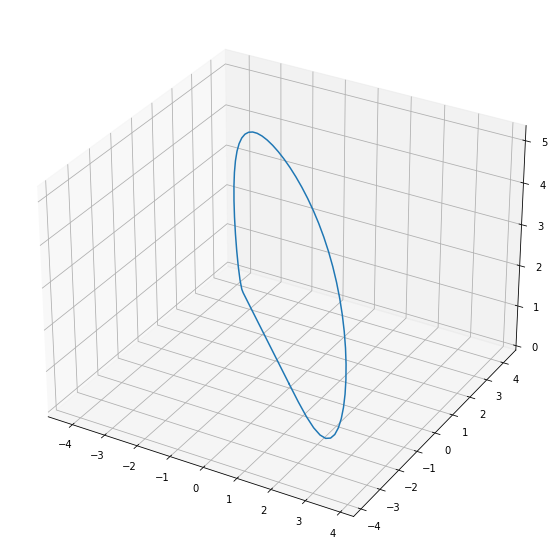

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

g = Gait()
V = 2
dir = np.math.radians(45)
time = np.linspace(0.,0.5,100)

X=[]
Y=[]
Z=[]
pos = []
for i in time:
    pos = g.gait(i, 100, dir, 0,0,0)
    X.append(pos[0][0])
    Y.append(pos[0][1])
    Z.append(pos[0][2])


# for p in phase:
#     x,y,z = g.stance_phase(p, dir, V)
#     X.append(x)
#     Y.append(y)
#     Z.append(z)

# for p in phase:
#     x,y,z = g.swing_phase(p, dir, V)
#     X.append(x)
#     Y.append(y)
#     Z.append(z)

fig = plt.figure(figsize=(10,10))

# 设置三维图形模式
ax = fig.gca(projection='3d')

zero = [0]*len(Z)
# 绘制图形
ax.plot(X, Y, Z)

# 显示图形
plt.show()

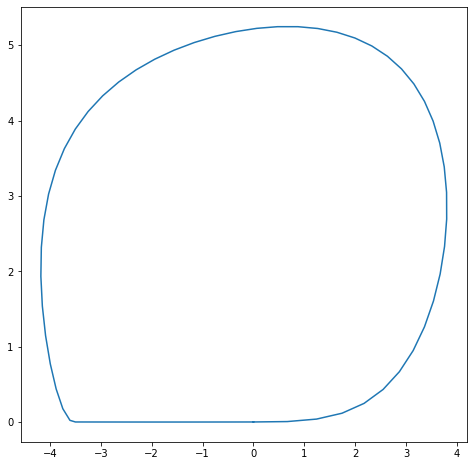

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(X,Z)
plt.show()

In [18]:
print(np.cos(np.math.radians(90)))
print(np.sin(np.math.radians(90)))

6.123233995736766e-17
1.0


In [75]:
print(X[0], Y[0], Z[0])
print(X[99], Y[99], Z[99])

0.05 -0.0 -6.123233995736766e-19
-0.05 0.0 -6.123233995736766e-19


In [106]:
import numpy as np

In [108]:
# print(np.clip())
print(np.array([0,1,0])+2)

[2 3 2]


In [115]:
a = np.empty((4,3))
print(a)

[[0.08103122 0.04938493 0.99655875]
 [0.02288805 0.08332496 1.0505261 ]
 [0.07809435 0.02666972 0.96043976]
 [0.01993818 0.00182447 0.91513173]]
